 # Nettoyage des données Projet Immo

Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


## Import des données

In [2]:
immo_df = pd.read_csv("immo.csv", delimiter=",")

In [3]:
immo_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


Explication des differentes colonnes: 
1.	**longitude**
2.	**latitude**
3.	**housingMedianAge**: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
4.	**totalRooms**: Nombre total de chambres dans un bloc
5.	**totalBedrooms**: Nombre total de chambres dans un bloc
6.	**population**: Nombre total de personnes résidant dans un bloc
7.	**households**: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
8.	**medianIncome**: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
9.	**medianHouseValue**: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
10.	**oceanProximity**: Situation de la maison par rapport à la mer


## Exploration des données 

### Observation des données

In [4]:
immo_df.shape

(16512, 11)

In [5]:
immo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


### La colonne Unnamed

In [6]:
immo_df.duplicated(['Unnamed: 0']).value_counts()

False    16512
dtype: int64

La colonne Unnamed: 0 ne contient que des valeurs unique, cette colonne doit correspondre à l'index

In [7]:
immo_df.set_index(['Unnamed: 0'], inplace = True)
immo_df.index.names = [None]
immo_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


### Données dupliqué 

In [49]:
immo_df[immo_df.duplicated(subset=['longitude','latitude'])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17934,-121.95,37.35,48.0,1246.0,294.0,697.0,284.0,3.6118,235500.0,<1H OCEAN
208,-122.23,37.79,30.0,610.0,145.0,425.0,140.0,1.6198,122700.0,NEAR BAY
1164,-121.55,39.51,48.0,827.0,198.0,396.0,161.0,0.8024,58300.0,INLAND
6779,-118.15,34.11,39.0,2618.0,582.0,1314.0,532.0,3.5875,309300.0,<1H OCEAN
7229,-118.16,34.02,44.0,1218.0,374.0,1175.0,342.0,1.9688,173900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
433,-122.29,37.88,46.0,1895.0,442.0,920.0,425.0,2.9926,192100.0,NEAR BAY
11527,-118.08,33.77,26.0,2461.0,562.0,971.0,544.0,2.1944,87500.0,<1H OCEAN
14696,-117.09,32.79,36.0,1529.0,266.0,683.0,260.0,4.0982,171200.0,NEAR OCEAN
18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY


In [47]:
duplicate = immo_df.loc[(immo_df.duplicated(['longitude']) & (immo_df.duplicated(['latitude']) 


SyntaxError: unexpected EOF while parsing (3913948568.py, line 1)

### Données manquante : Total Bedrooms

In [14]:
immo_df['total_bedrooms'].isnull().value_counts()

False    16336
True       176
Name: total_bedrooms, dtype: int64

Une des colonnes ( total_bedrooms) contient des valeurs null (176 sur 16512).

In [16]:
null = immo_df.loc[immo_df['total_bedrooms'].isnull()]
null

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,<1H OCEAN
2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,98100.0,NEAR OCEAN
10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,105200.0,INLAND
19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,127100.0,INLAND
19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,357500.0,NEAR OCEAN
17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,NEAR OCEAN
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,<1H OCEAN
9942,-122.23,38.17,45.0,350.0,NaN,225.0,72.0,1.8942,216700.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

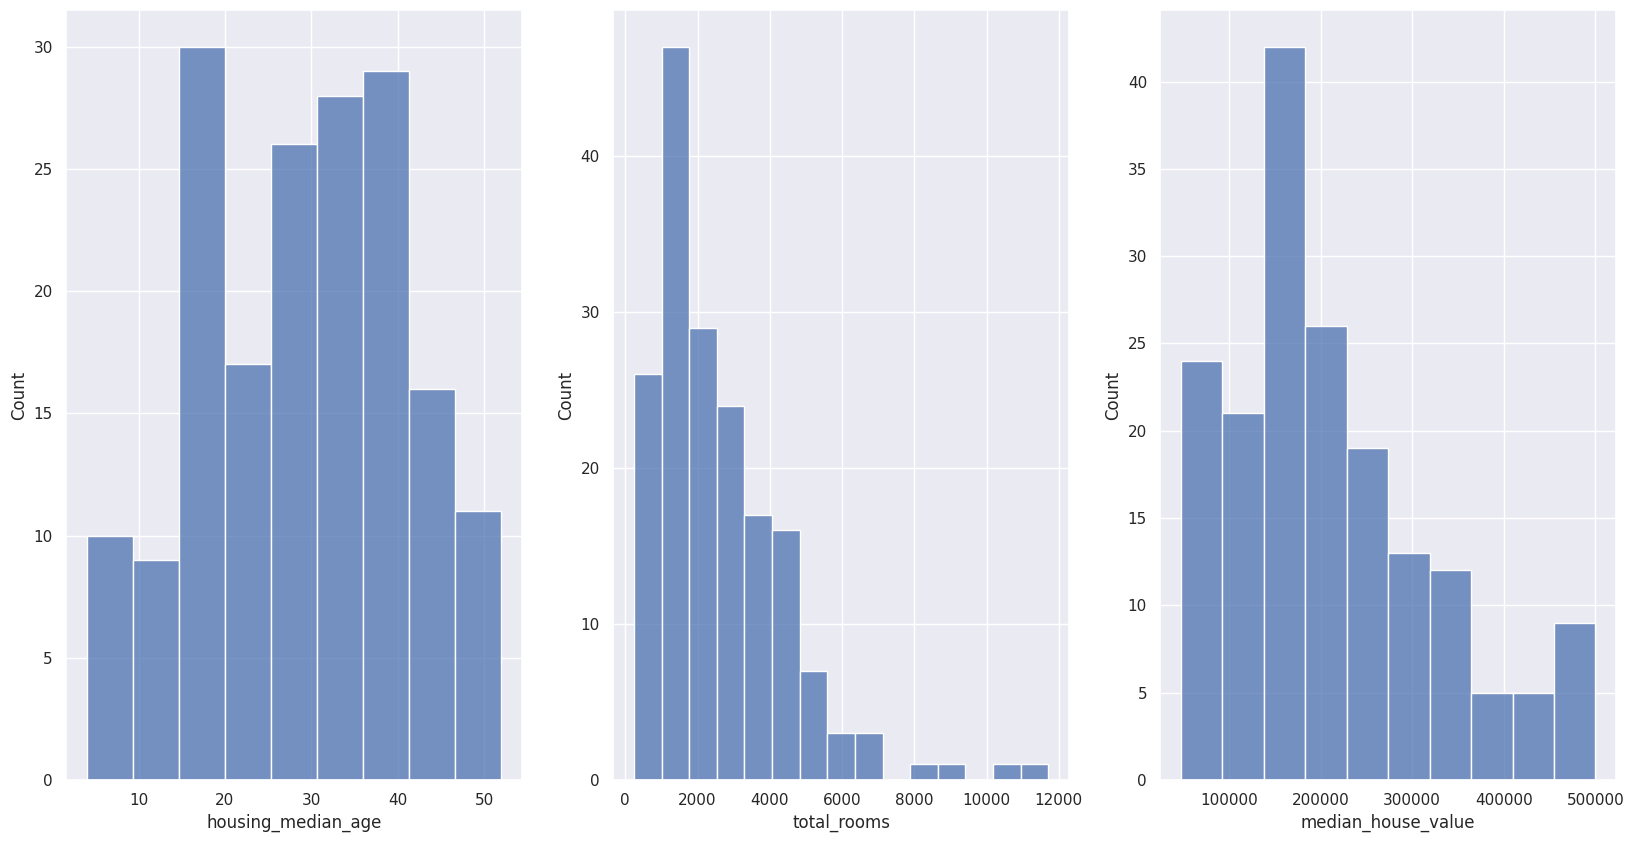

In [35]:
sns.set(rc={"figure.figsize":(20,10)},style='darkgrid')
fig, ax =plt.subplots(1,3)
sns.histplot(x=null["housing_median_age"], ax=ax[0])
sns.histplot(x=null["total_rooms"], ax=ax[1])
sns.histplot(x=null["median_house_value"], ax=ax[2])


Imputation ? suppression ? Realisation d'une veille pour choisir quel technique me semble le plus addapté a la situation. Données qui seront potentiellement reprise lors de la prochaine iteration de nettoyage si le choix ne conviens pas 

### Analyse des données

In [8]:
immo_df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7312
mean,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453,NaN
std,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661,NaN
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,NaN
25%,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000,NaN
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000,NaN
75%,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000,NaN


<AxesSubplot:>

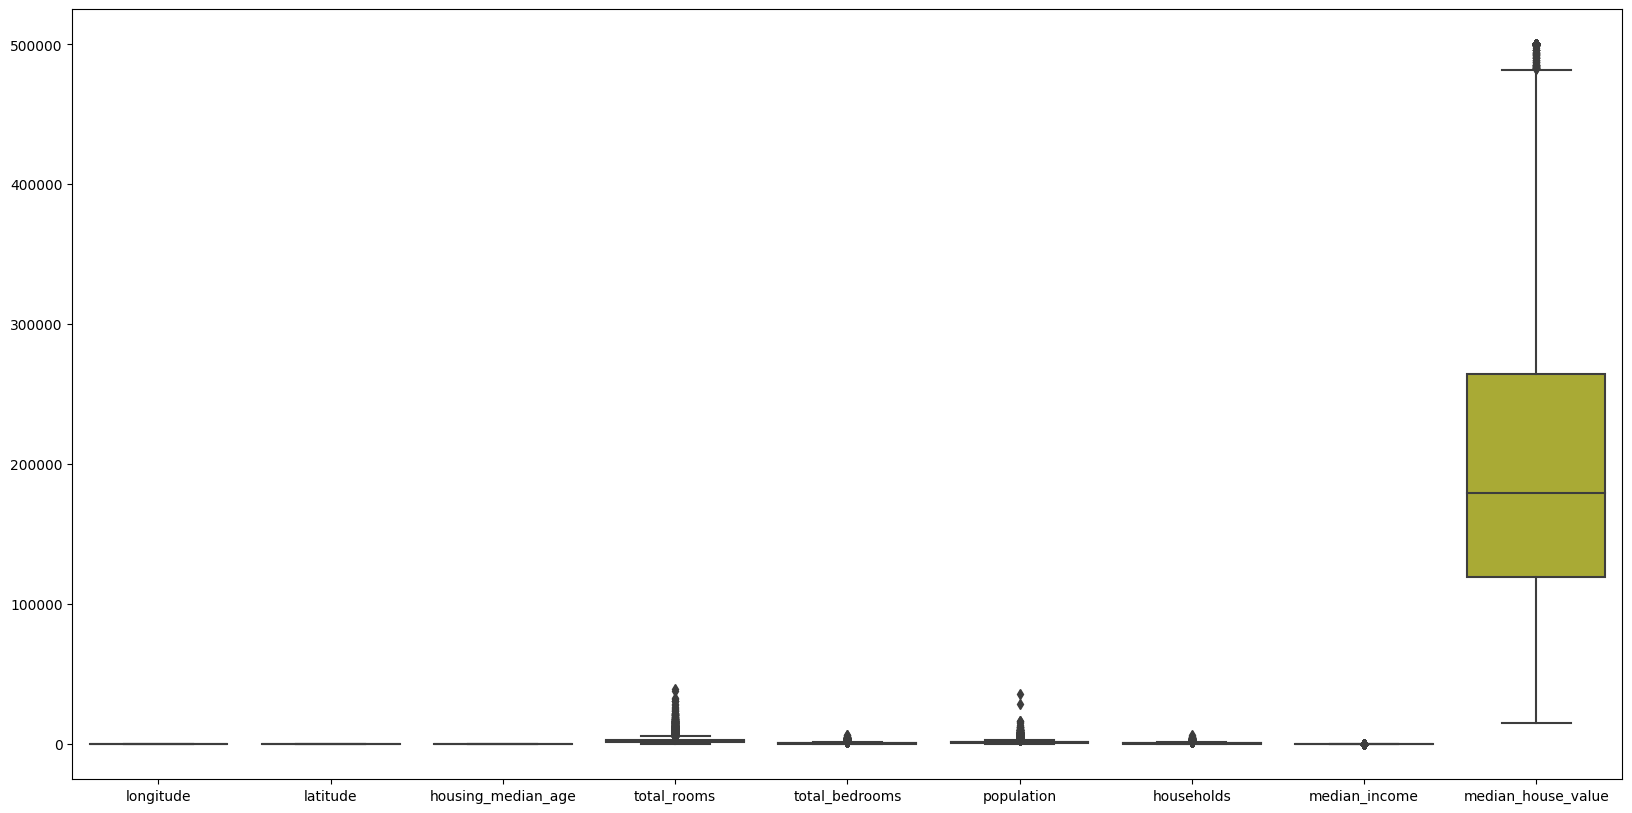

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=immo_df)

<AxesSubplot:ylabel='median_income'>

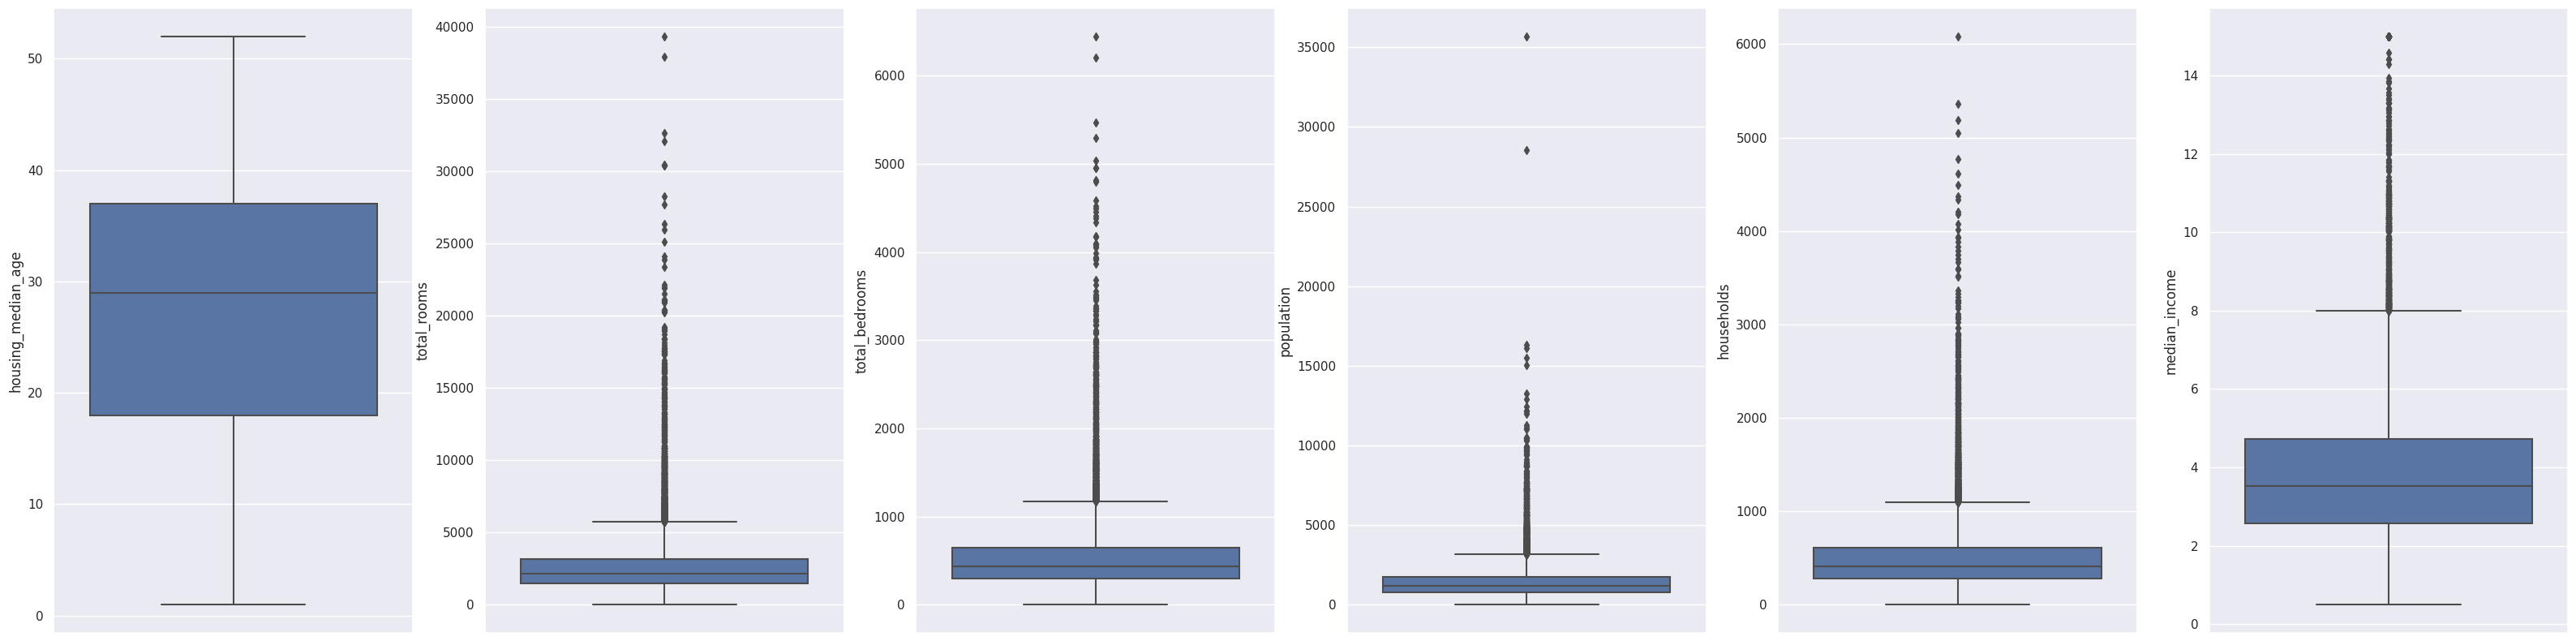

In [31]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,6)
sns.boxplot(y=immo_df["housing_median_age"], ax=ax[0])
sns.boxplot(y=immo_df["total_rooms"], ax=ax[1])
sns.boxplot(y=immo_df["total_bedrooms"], ax=ax[2])
sns.boxplot(y=immo_df["population"], ax=ax[3])
sns.boxplot(y=immo_df["households"], ax=ax[4])
sns.boxplot(y=immo_df["median_income"], ax=ax[5])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

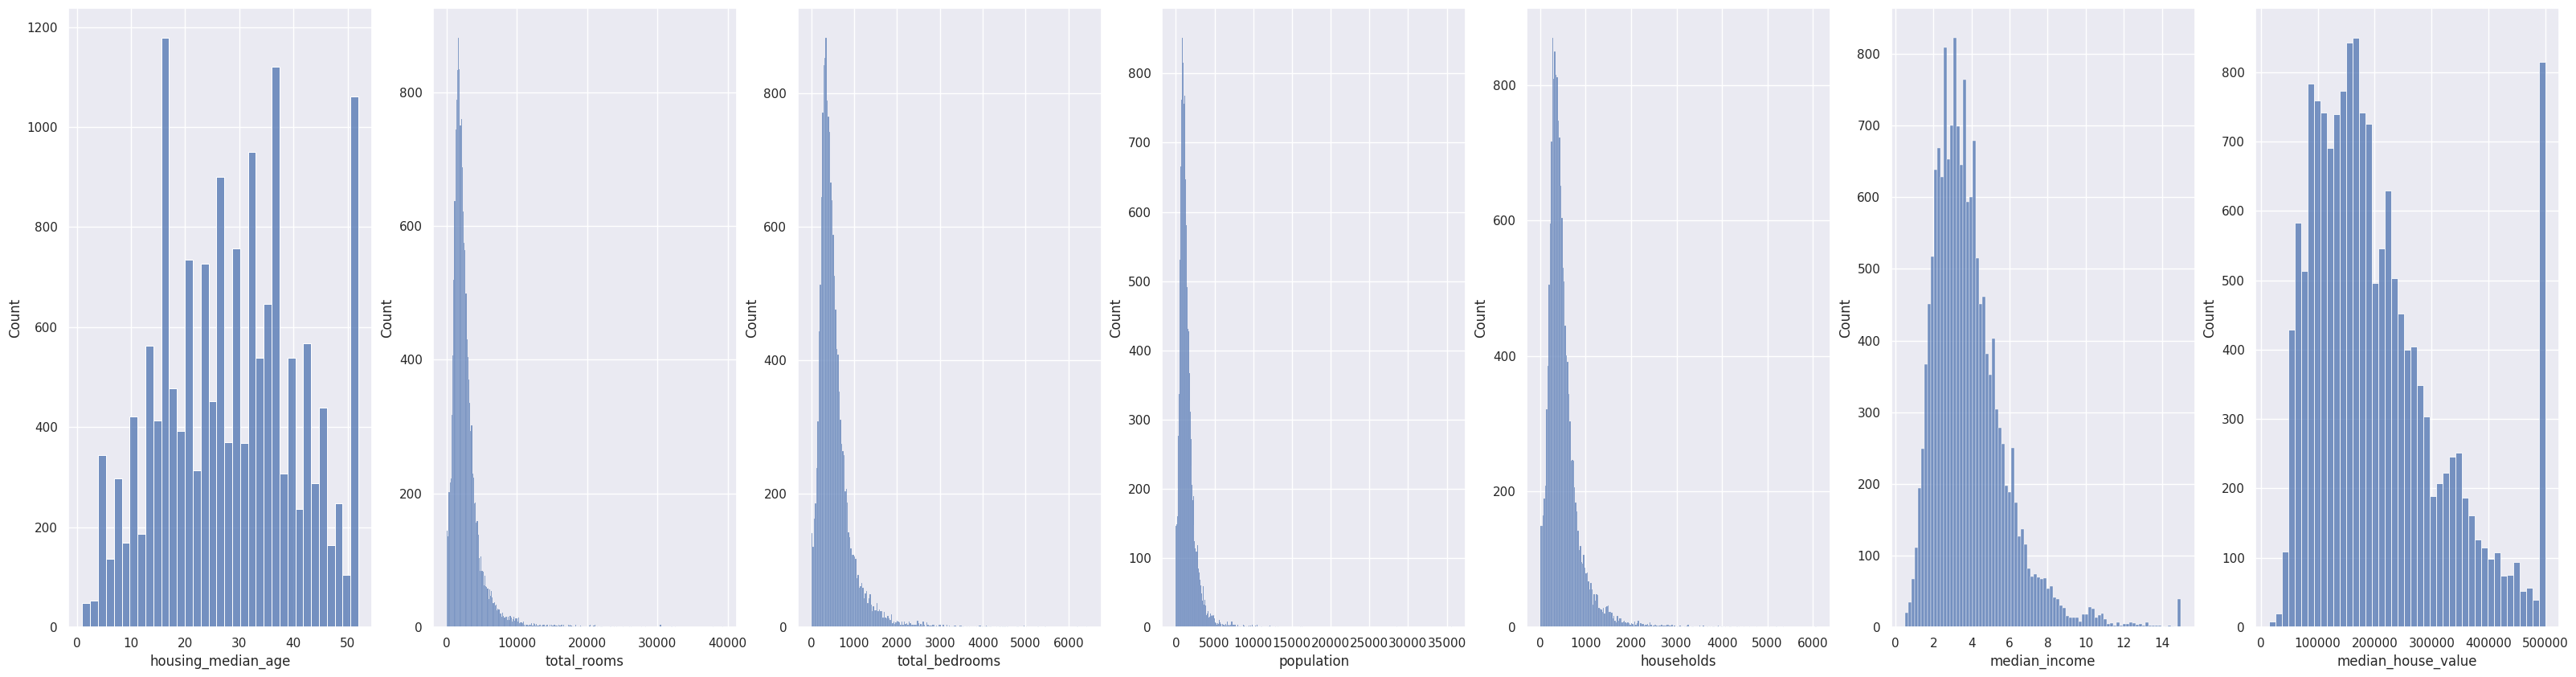

In [34]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,7)
sns.histplot(x=immo_df["housing_median_age"], ax=ax[0])
sns.histplot(x=immo_df["total_rooms"], ax=ax[1])
sns.histplot(x=immo_df["total_bedrooms"], ax=ax[2])
sns.histplot(x=immo_df["population"], ax=ax[3])
sns.histplot(x=immo_df["households"], ax=ax[4])
sns.histplot(x=immo_df["median_income"], ax=ax[5])
sns.histplot(x=immo_df["median_house_value"], ax=ax[6])

### Recherche de donnée abérante

###  Observation de la localisation des biens et transformation de la colonne ocean_proximity